In [1]:
# Add the parent directory to the path so that we can import the src module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from src.fileutils import PROJECT_ROOT
from src.camera.video import VideoStream
from src.pose.orientation_estimation import OrientationEstimation

In [3]:
model_path = PROJECT_ROOT / "models" / "doe" / "spindoe.ckpt"
use_gpu = False
orientation_estimator = OrientationEstimation(model_path, use_gpu, doe_expected_brightness=55)

Lightning automatically upgraded your loaded checkpoint from v1.9.3 to v2.2.1. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\agpri\OneDrive\Documents\GitHub\PingPongTracking\models\doe\spindoe.ckpt`


Saving hyperparmeters
DOE  initiated


In [4]:
rolling_video_path = PROJECT_ROOT / "data" / "orientation_images" / "rolling.mp4"
rolling_video = VideoStream(rolling_video_path)
print(rolling_video)

VideoStream:
	Source: C:\Users\agpri\OneDrive\Documents\GitHub\PingPongTracking\data\orientation_images\rolling.mp4
	FPS: 30.0
	Frames: 51
	Resolution: 1920x1080



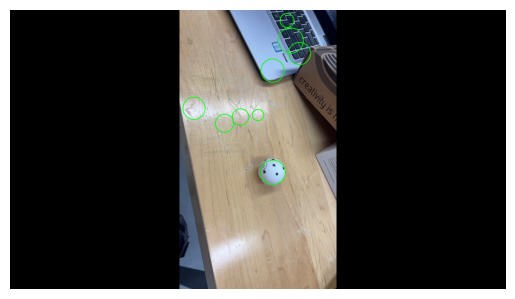

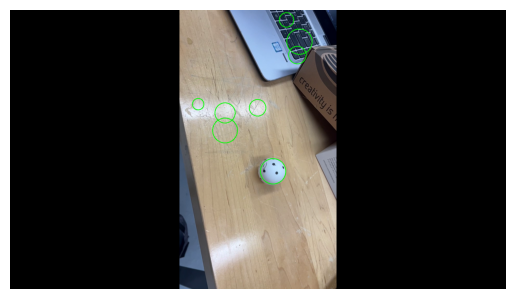

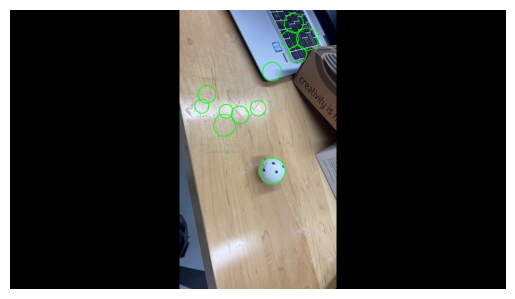

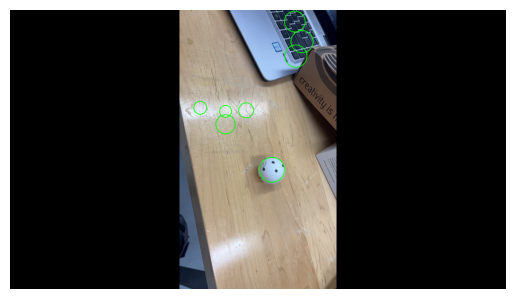

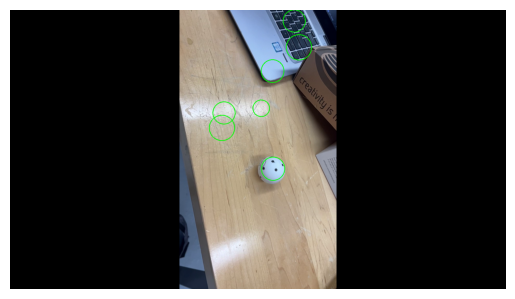

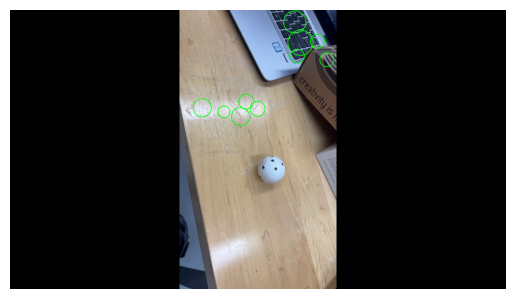

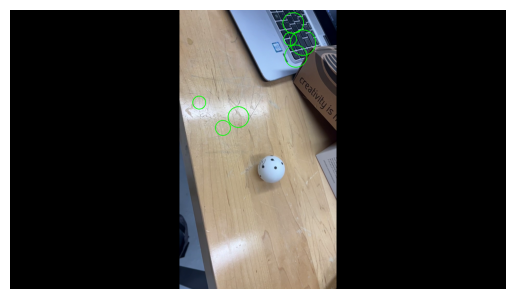

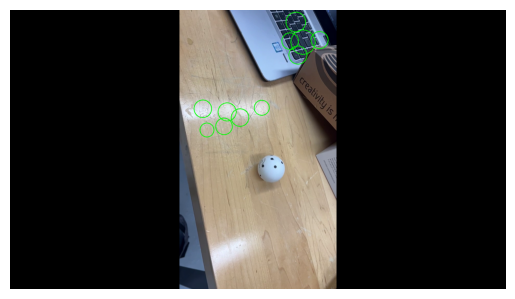

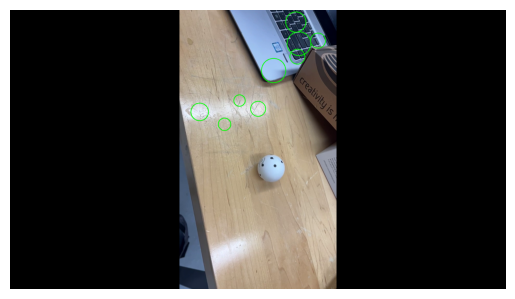

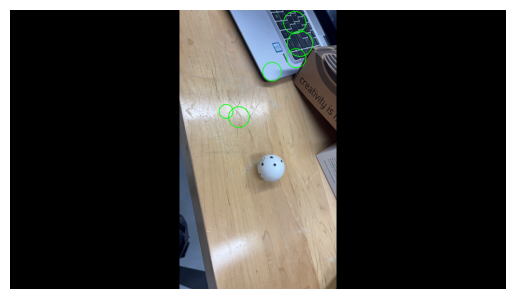

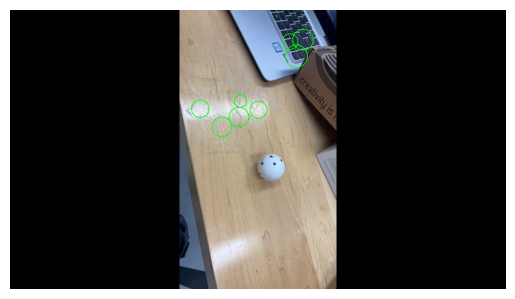

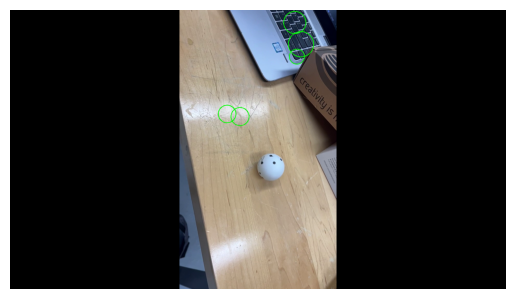

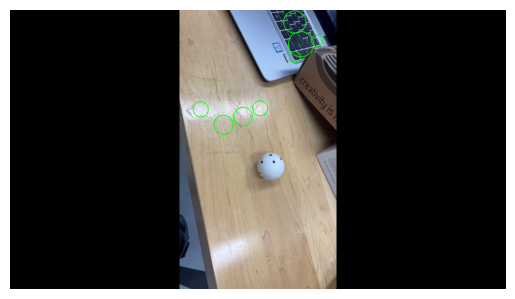

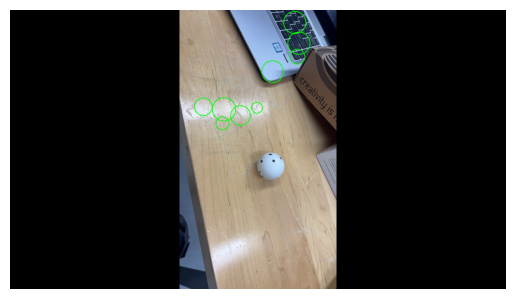

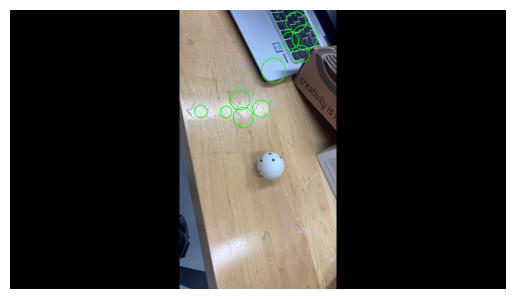

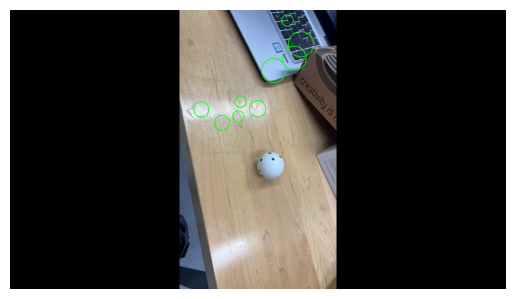

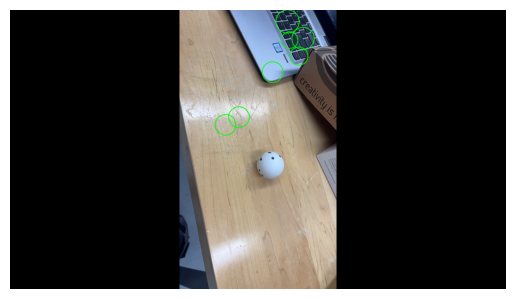

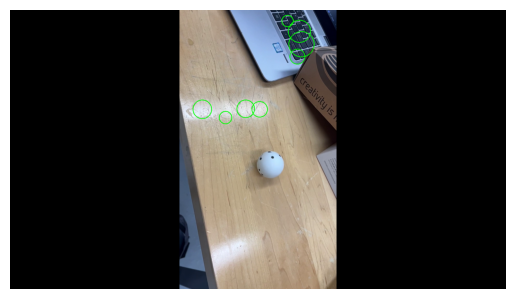

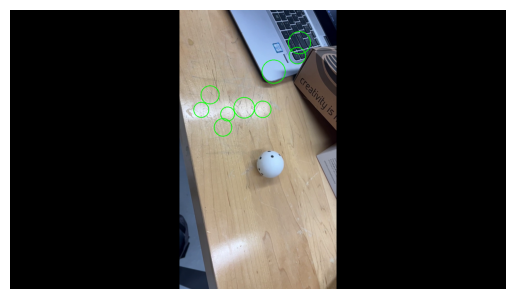

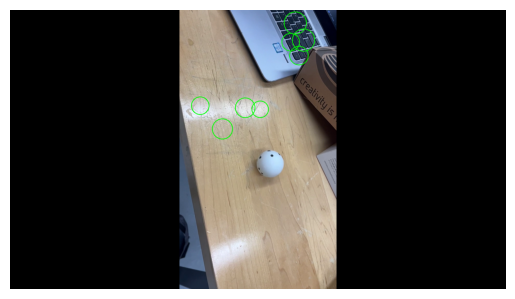

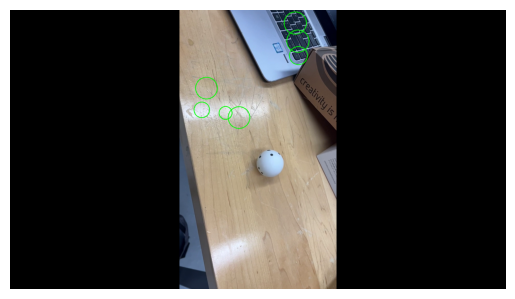

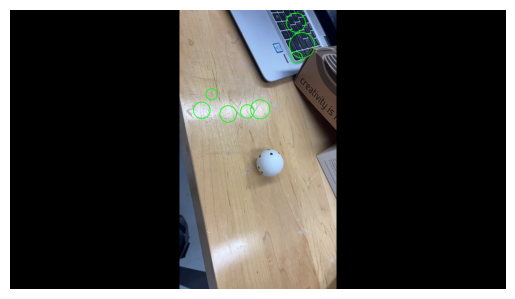

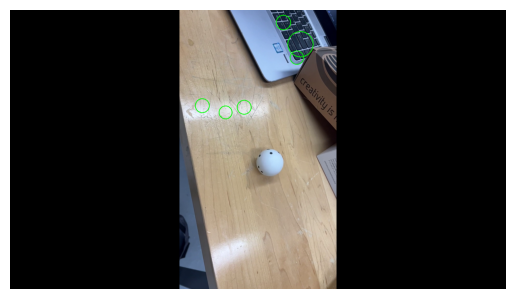

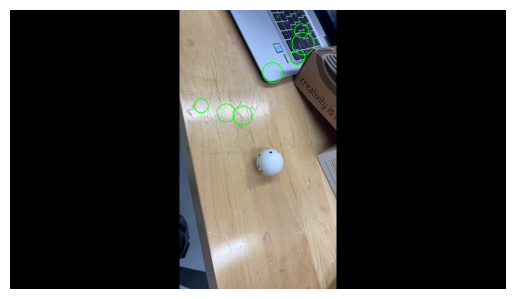

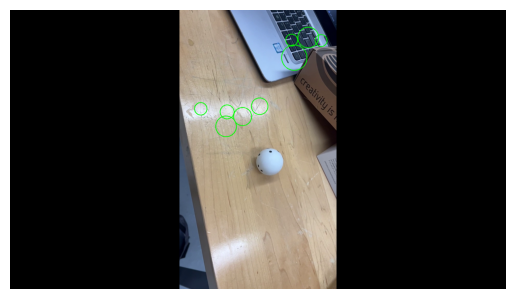

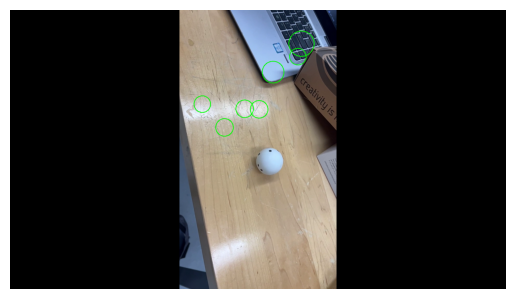

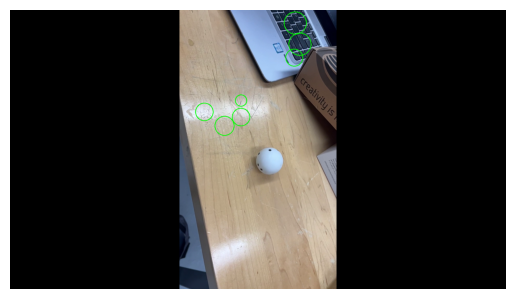

KeyboardInterrupt: 

In [5]:
aug_imgs = []
for img in rolling_video:

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Hough transform to detect circles
    circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=20, maxRadius=50)

    # Draw detected circles on the image
    if circles is not None:
        circles = np.round(circles[0, :]).astype(int)
        for (x, y, r) in circles:
            cv2.circle(img, (x, y), r, (0, 255, 0), 2)

    # Display the image with detected circles
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    break

    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # rot, preprocessed_img, aug_img, heatmap = orientation_estimator.estimate_orientation_with_doe_debug(
    #         image=img,
    #         ball_mask=None,
    #         ball_center_x=img.shape[0]//2,
    #         ball_center_y=img.shape[1]//2,
    #         ball_radius=img.shape[0]//2,
    #     )
    
    # aug_imgs.append(aug_img)

In [ ]:
# Get the dimensions of the first image
height, width, _ = aug_imgs[0].shape

# Create a VideoWriter object to save the stitched video
output_path = 'stitched_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (width, height))

# Write each frame to the video
for frame in aug_imgs:
    out.write(frame)

# Release the VideoWriter object
out.release()

print(f"Stitched video saved at {output_path}")
